In [1]:
# utwórz model sieci neuronowej do klasyfikacji kwiatów irysów ze zbioru iris w oparciu o bibliotekę tensorflow 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

# Loader Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# One-hot encoding for target variable
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

# Data normalization
X = X / X.max(axis=0)

# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Define the model architecture
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=[4]),  # input shape = number of features
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')  # output layer, output shape = number of categories
])

# Compile the model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# Fit the data
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:', accuracy)

Epoch 1/200
3/3 [==============================] - 1s 120ms/step - loss: 1.1382 - accuracy: 0.3214 - val_loss: 1.1058 - val_accuracy: 0.1905
Epoch 2/200
3/3 [==============================] - 0s 14ms/step - loss: 1.1235 - accuracy: 0.3571 - val_loss: 1.1037 - val_accuracy: 0.2857
Epoch 3/200
3/3 [==============================] - 0s 18ms/step - loss: 1.1109 - accuracy: 0.3690 - val_loss: 1.1016 - val_accuracy: 0.2857
Epoch 4/200
3/3 [==============================] - 0s 15ms/step - loss: 1.1009 - accuracy: 0.3690 - val_loss: 1.1005 - val_accuracy: 0.2857
Epoch 5/200
3/3 [==============================] - 0s 15ms/step - loss: 1.0896 - accuracy: 0.3690 - val_loss: 1.0993 - val_accuracy: 0.2857
Epoch 6/200
3/3 [==============================] - 0s 16ms/step - loss: 1.0814 - accuracy: 0.3690 - val_loss: 1.0994 - val_accuracy: 0.2857
Epoch 7/200
3/3 [==============================] - 0s 15ms/step - loss: 1.0732 - accuracy: 0.3690 - val_loss: 1.0990 - val_accuracy: 0.2857
Epoch 8/200
3/3 [==

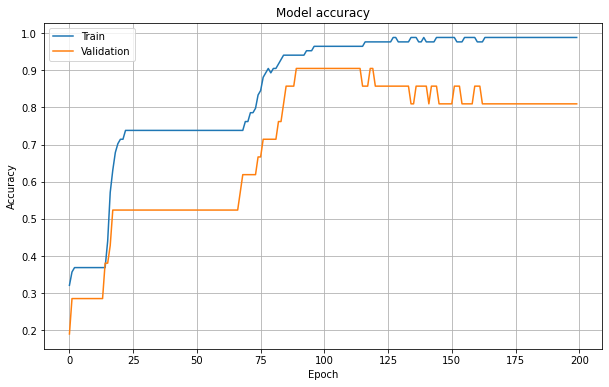

In [2]:
# zbuduj wykres zależności epoki i accuracy 
import matplotlib.pyplot as plt

# Plotting Accuracy vs Epoch
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid()
plt.show()